# The Foraging of Slime Mold

总之我在试着以“仿写一个Lab”的标准写`.ipynb`文档


---



# Setup

## Installing Libraries

In [24]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Downloading Python Scripts

In [25]:
import numpy as np

from os.path import basename, exists

def download(url):
  filename = basename(url)
  if not exists(filename):
    from urllib.request import urlretrieve
    local, _ = urlretrieve(url, filename)
    print('Downloaded ' + local)

download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell2D.py')

from utils import decorate, savefig

# make a directory for figures
!mkdir -p figs

��Ŀ¼���ļ� -p �Ѿ����ڡ�
����: -p ʱ������
��Ŀ¼���ļ� figs �Ѿ����ڡ�
����: figs ʱ������


# NumPy数组速查笔记
摘抄ABM Lab里可能用到的东西



## NumPy数组
`list()`创建一个列表

[`numpy.array(object, dtype=None)`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)创建一个NumPy数组类的实例`numpy.ndarray`，数组元素由传参决定
* `dtype=None`默认自动选择合适的数据类型
* `dtype=int8`选择8位整型以节省存储空间
* **操作符**的**操作对象**基本被重载为对NumPy数组的每个元素
* ### 元素数据类型转换
[`array.astype(dtype)`](https://numpy.org/doc/stable/reference/generated/numpy.astype.html#numpy-astype)将NumPy数组的元素转换为指定数据类型，*不改变原数据*

[`numpy.nonzero(array)`](https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html)返回NumPy数组中非零元素的**索引数组**构成的元组，按维度的顺序进行分类

* `*`用于解包可迭代对象以获取参数
* `zip(*iterables)`将相同索引位置的解包值打包为元组

[`numpy.shape(array)`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html)NumPy数组特化的`len()`
* `np.shape[1]`或`len(array[0])`: 返回x轴长
* `np.shape[0]`或`len(array)`: 返回y轴长

In [26]:
x = [[[3, 0, 0], [0, 4, 0], [5, 6, 0]]]
y = np.array([[3, 0, 0], [0, 4, 0], [5, 6, 0]], dtype=None)
print(type(x))
print(x)

print(type(y))
print(y)
print(np.nonzero(y))
print(*np.nonzero(y))
print(list(zip(*np.nonzero(y))))

print(type(y))
print(y+10)   # + - = 之类的操作符被重载为对数组的每个元素都生效

z = y==0
print(type(z))
print(z.astype('uint8'))
print(z)

<class 'list'>
[[[3, 0, 0], [0, 4, 0], [5, 6, 0]]]
<class 'numpy.ndarray'>
[[3 0 0]
 [0 4 0]
 [5 6 0]]
(array([0, 1, 2, 2]), array([0, 1, 0, 1]))
[0 1 2 2] [0 1 0 1]
[(np.int64(0), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(2), np.int64(0)), (np.int64(2), np.int64(1))]
<class 'numpy.ndarray'>
[[13 10 10]
 [10 14 10]
 [15 16 10]]
<class 'numpy.ndarray'>
[[0 1 1]
 [1 0 1]
 [0 0 1]]
[[False  True  True]
 [ True False  True]
 [False False  True]]


## 随机数

###概率分布
[`numpy.random.choice(array, size=None, replace=True, p=None)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)从给定的**一维数组**中随机选择数个元素，构建NumPy数组
* `size=(n, m)`二维
* `replace=True`默认允许元素的重复选取
* `p=None`指定了数组中逐元素对应的概率，默认呈均匀分布

In [27]:
choices = np.array([0, 1, 2], dtype=np.int8)    # 8位的0,1,2
probs = [0.2, 0.4, 0.4]

test_array = np.random.choice(choices, (5, 5), p=probs)
test_array

array([[1, 1, 1, 2, 1],
       [0, 0, 0, 2, 1],
       [1, 0, 1, 2, 2],
       [2, 1, 2, 2, 0],
       [0, 2, 2, 1, 1]], dtype=int8)

### 乱序
[`numpy.random.shuffle`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html)沿着多位数组的第一个轴对数据进行打乱，子数组的顺序发生改变

In [28]:
ls = list(range(10))
np.random.shuffle(ls)
print(ls)

arr = np.arange(10)
np.random.shuffle(arr)
arr

[8, 0, 2, 4, 6, 1, 7, 9, 5, 3]


array([7, 2, 1, 9, 5, 0, 3, 6, 8, 4])

## 互相关 Cross-Correlation
原理见CA Lab 1-2

In [29]:
from scipy.signal import correlate2d

options = dict(mode='same', boundary='wrap')
kernel = np.array([[1, 1, 1],
          [1, 0, 1],
          [1, 1, 1]], dtype=np.int8)         # cross-correlation基于位置求积的和
# count the number of red neighbours
correlate2d(test_array, kernel, **options)            # **将dict解包为关键字参数
correlate2d(test_array, kernel, mode='same', boundary='wrap')  # 等价写法

array([[ 6,  6, 10,  9,  8],
       [ 7,  5,  9, 10, 11],
       [ 6,  7,  9, 10, 10],
       [ 7, 10, 11, 11, 11],
       [ 9, 10, 12, 11,  9]], dtype=int8)

## 可视化的主题色

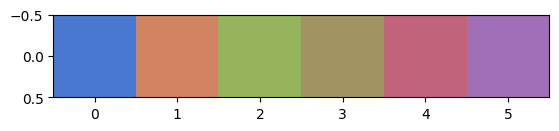

In [30]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt

# 定义颜色映射
palette = sns.color_palette('muted')      # 中等饱和度的预定义调色板
colors = [palette[0], palette[1], palette[2], palette[3], palette[4], palette[6]]
cmap = LinearSegmentedColormap.from_list("cmap", colors)

# 创建数据
data = np.array([[0,1,2,3,4,5]], dtype=None)

# 绘制热图
plt.imshow(data, cmap=cmap, vmin=0, vmax=6)
plt.xticks(np.arange(0, data.shape[1], step=1))
plt.show()

# 黏菌的行为模式设计

* 黏菌生活在二维离散的迷宫（培养皿）中，其通过数条伪足探索迷宫试图找到唯一的燕麦
  * 初始化随机但不一定连续的墙柱
* 伪足的产生需要消耗能量，只有成功找到燕麦的伪足不会饿死
 * 假设伪足无法斜向蔓延，以避免三包一时的“穿墙”问题
 * 蔓延速度决定了每一步的蔓延格数
    * 每步的蔓延速度如何对应DFS栈/BFS队列的深度？——每一步只能消耗有限的能量用于`pop()`
* 随着时间推移，呈现 少-广-精 的变化
  * 折线图的纵轴是什么？——占地面积
* More rules
  * 多个黏菌与多个燕麦
  * 黏菌的合作
  * 黏菌本体的死亡


# Custom Color Map 调色盘示例

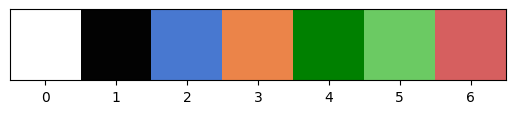

In [31]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

# make a custom color map
palette = sns.color_palette('muted')
colors = ["white", "black", palette[0], palette[1], "green", palette[2], palette[3]]
cmap = LinearSegmentedColormap.from_list("cmap", colors)

# make a color dict
color = {
    "white" : 0,
    "black" : 1,
    "blue" : 2,
    "orange" : 3,
    "green" : 4,
    "light_green" : 5,
    "red" : 6
}

# map item to color
item_color = {
    "path" : color["white"],
    "wall" : color["black"],
    "oat" : color["red"],
    "mold" : color["green"],
    "growth" : color["light_green"]
}
# demo
colors_demo = np.arange(7).reshape(1, -1)
draw_params = {'cmap': cmap, 'vmin': 0, 'vmax': 6, 'alpha': 1}

color_path = item_color["path"]
color_wall = item_color["wall"]
color_oat = item_color["oat"]
color_mold = item_color["mold"]
color_growth = item_color["growth"]

# show palette
plt.imshow(colors_demo, cmap=cmap, vmin=0, vmax=6)
plt.xticks(np.arange(0, colors_demo.shape[1], step=1))
plt.yticks([])  # remove y-axis
plt.show()

# Model Implementation 代码实现

In [41]:
from Cell2D import Cell2D, draw_array
from utils import three_frame
from IPython.display import clear_output
from time import sleep

class SlimeMoldForaging(Cell2D):

  def __init__(self, height=19, width=19):
    # create a 2-D array filled with 1, namely solid wall
    self.height = height
    self.width = width
    self.array = np.ones((height, width), dtype=np.int8)  # the maze
    self.start_x = np.random.randint(0, (width // 2)) * 2 + 1
    self.start_y = np.random.randint(0, (height // 2)) * 2 + 1
    self.array[self.start_y][self.start_x] = 0
    self.stack = [(self.start_x, self.start_y)]
    self.queue = []

  def place_item(self, item):
    if len(np.argwhere(self.array == color[item_color[item]])) != 0:
      return

    # find all pathway cells
    paths = np.argwhere(self.array == color[item_color["path"]])

    # Randomly place item
    item_index = np.random.choice(len(paths))
    item_coord = paths[item_index]

    # map the item to color, then to index
    self.array[item_coord[0], item_coord[1]] = color[item_color[item]]

    if item == "mold":
      mold_coord = np.argwhere(self.array == color[item_color["mold"]])[0]
      mold_x = mold_coord[1]
      mold_y = mold_coord[0]
      self.queue.append((int(mold_x), int(mold_y)))

  def carve_pathway(self):
    while self.stack:
      self.step("carve_pathway")

  def carve_pathway_step(self):
    """Essentially based on DFS"""
    if self.stack:
      x, y = self.stack[-1]          # get the last one rather than pop() it
      carve_directions = [(0, 2), (0, -2), (2, 0), (-2, 0)]
      np.random.shuffle(carve_directions)     # Randomness of direction chosen

      carved = False              # dead end flag
      for direct_x, direct_y in carve_directions:
        new_x = x + direct_x
        new_y = y + direct_y
        if 0 <= new_x < self.array.shape[1] and 0 <= new_y < self.array.shape[0] and self.array[new_y][new_x] == color[item_color["wall"]]:
          self.array[y + direct_y // 2][x + direct_x // 2] = 0
          self.array[new_y][new_x] = color[item_color["path"]]
          self.stack.append((new_x, new_y))
          carved = True
          break

      # dead end
      if not carved:
        self.stack.pop()

  def forage(self):
    while self.queue:
        self.forage_step()

  def forage_step(self):
    """Essentially based on BFS"""
    if self.queue:
      x, y = self.queue.pop(0)  # 从队列获取第一个元素

      # 方向: 上, 下, 左, 右
      forage_directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

      for direct_x, direct_y in forage_directions:
        new_x = x + direct_x
        new_y = y + direct_y

        if 0 <= new_x < self.array.shape[1] and 0 <= new_y < self.array.shape[0] and self.array[new_y][new_x] in [color[item_color["path"]], color[item_color["oat"]]]:
          if self.array[new_y][new_x] != color[item_color["oat"]]:
            self.array[new_y][new_x] = color[item_color["growth"]]
          self.queue.append((new_x, new_y))

  def step(self, process):
    """Performs one step of the maze carving

    called by Cell2D.py

    process: the stage of model
    """
    if process == "carve_pathway":
      self.carve_pathway_step()
    elif process == "forage":
      self.forage_step()

  def loop(self, process, iters=1):
    """Runs the given number of steps.

    refactor Cell2D.loop()

    process: the stage of model
    """
    for i in range(iters):
      self.step(process)

  def animate(self, process, frames, interval=None, step=None):
    """Animate the automaton.

    refactor Cell2D.animate()

    process: the stage of model
    frames: number of frames to draw
    interval: time between frames in seconds
    iters: number of steps between frames
    """
    if step is None:
        step = self.step

    plt.figure()
    try:
        for i in range(frames-1):
            self.draw()
            plt.show()
            if interval:
                sleep(interval)
            step(process)
            clear_output(wait=True)
        self.draw()
        plt.show()
    except KeyboardInterrupt:
        pass

  def draw(self):
    plt.imshow(self.array, cmap=cmap, vmin=0, vmax=6)
    plt.axis('off')

def three_frame(world, process, n_seq, seed=17):
    """Customized parameters of three_frame() to show frames in different stages of SlimeMoldForaging modelling

    modify three_frame() from utils.py
    """
    np.random.seed(seed)
    plt.figure(figsize=(10, 4))

    for i, n in enumerate(n_seq):
        plt.subplot(1, 3, i+1)
        world.loop(process, n)
        world.draw()

    plt.tight_layout()

In [69]:
from Cell2D import Cell2D, draw_array
from utils import three_frame

class SlimeMoldForaging(Cell2D):
  def __init__(self, height=19, width=19):
      super().__init__(height, width)
      self.height = height  # 保存为类属性
      self.width = width  # 保存为类属性
      self.array = np.ones((height, width), dtype=np.int8)  # 初始化墙壁
      self.start_x, self.start_y = np.random.randint(0, (self.width // 2)) * 2 + 1, np.random.randint(0, (self.height // 2)) * 2 + 1
      self.array[self.start_y, self.start_x] = 0  # 设置起始点为路径
      self.stack = [(self.start_x, self.start_y)]  # 迷宫生成的栈
      self.queue = []  # BFS 队列
      self.process = ""

  def place_item(self, item):
      """随机放置指定的物品在路径上"""
      if np.any(self.array == item_color[item]):
          return

      paths = np.argwhere(self.array == color_path)      
      item_coord = paths[np.random.choice(len(paths))]
      self.array[item_coord[0], item_coord[1]] = item_color[item]

      if item == "mold":
        self.queue.append((int(item_coord[1]), int(item_coord[0])))

  def carve_pathway_step(self):
      """深度优先生成迷宫路径"""
      while self.stack:
        x, y = self.stack[-1]
        carve_directions = [(0, 2), (0, -2), (2, 0), (-2, 0)]
        np.random.shuffle(carve_directions)
        
        carved = False              # dead end flag
        for direct_x, direct_y in carve_directions:
            new_x = x + direct_x
            new_y = y + direct_y
            if 0 <= new_x < self.array.shape[1] and 0 <= new_y < self.array.shape[0] and self.array[new_y][new_x] == color_wall:
                self.array[y + direct_y // 2][x + direct_x // 2] = 0
                self.array[new_y][new_x] = color_path
                self.stack.append((new_x, new_y))
                carved = True
                break
        # dead end
        if not carved:
            self.stack.pop()
        if "step" in self.process:
            break

  def forage_step(self):
      while self.queue:
        x, y = self.queue.pop(0)
        forage_directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        
        for dx, dy in forage_directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < self.width and 0 <= ny < self.height and self.array[ny, nx] in [color_path, color_oat]:
                self.array[ny, nx] = color_growth  if self.array[ny, nx] != color_oat else self.array[ny, nx]
                self.queue.append((nx, ny))
        if "step" in self.process:
                break
      
  def step(self):
      if "carve" in self.process:
           self.carve_pathway_step()
      elif "forage" in self.process:  
           self.forage_step()

  def draw(self):
    draw_array(self.array, **draw_params)   

# Maze Initialization



## 1.1 Carving Pathway

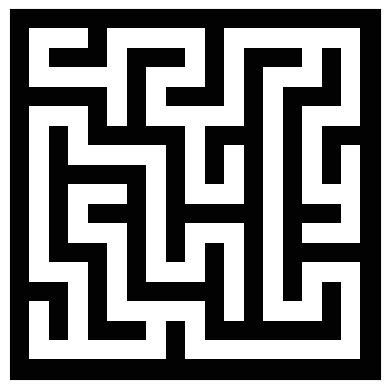

In [70]:
env = SlimeMoldForaging(height=19, width=19)    # width and height should preferably be odd nunmbers
env.process = "carve_pathway"
env.step()
#env.carve_pathway()
env.draw()

## 1.2 Place Mold and Oat

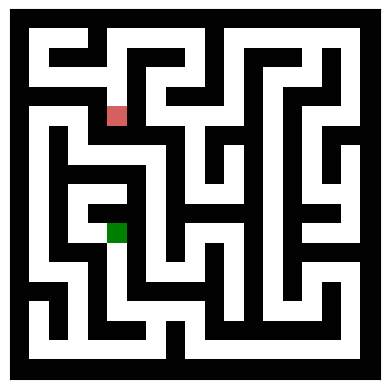

In [71]:
env.place_item("mold")      # present mold in green
env.place_item("oat")       # present oat in red
env.draw()

## 1.3 Progress Visualization

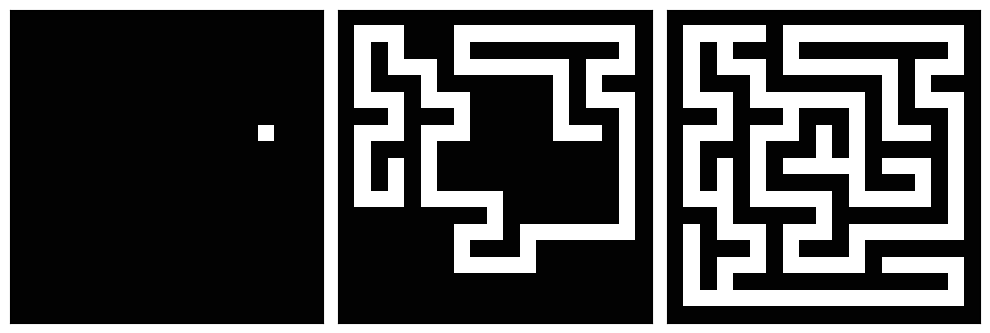

In [72]:
# Pathway carving frames
demo = SlimeMoldForaging(height=19, width=19)    # width and height should preferably be odd nunmbers
#three_frame(demo, "carve_pathway", n_seq = [0,1,2],seed=None)       # show frames at 50 and 150 steps
demo.process = "step_carve_pathway"
three_frame(demo, n_seq=[0,50,100],seed=None)       # show frames at 50 and 150 steps

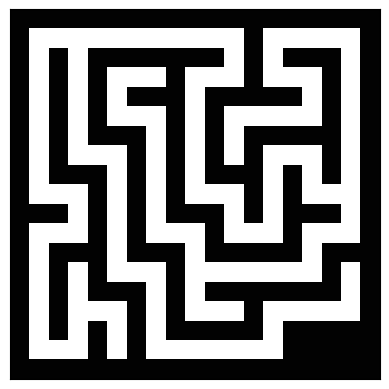

In [73]:
# Pathway carving animation
demo = SlimeMoldForaging(height=19, width=19)   # width and height should preferably be odd nunmbers
demo.process = "step_carve_pathway"
demo.animate(frames=150)

# Mold Foraging

## 2.1 Mold Foraging

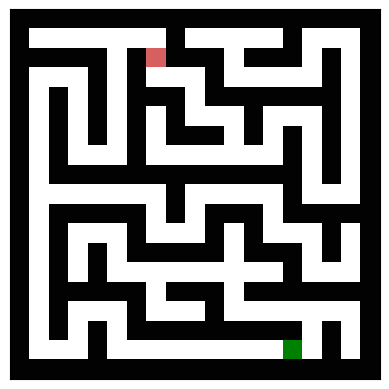

In [74]:
#env.forage()
env = SlimeMoldForaging(height=19, width=19)
env.process = "carve_pathway"
env.step()
env.place_item("mold")
env.place_item("oat")
env.process = "step_forage"
env.draw()

## 2.2 Progress Visualization

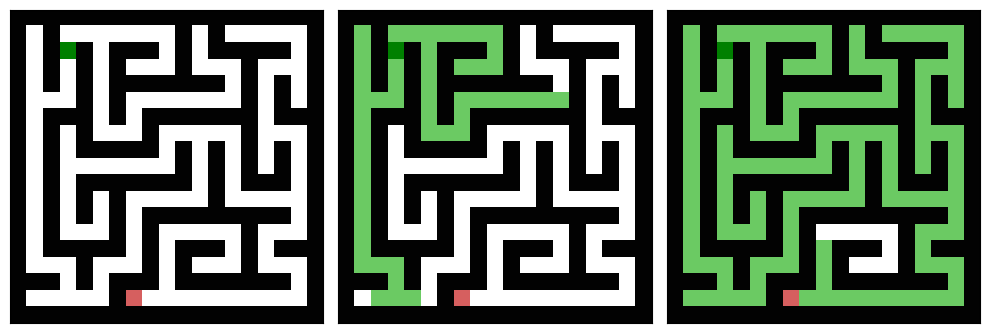

In [75]:
# Foraging frames
demo = SlimeMoldForaging(height=19, width=19)    # width and height should preferably be odd nunmbers
demo.process = "carve_pathway"
demo.step()
demo.place_item("mold")                 # present mold in green
demo.place_item("oat")                  # present oat in red
demo.process = "step_forage"
three_frame(demo, [0,50,100], seed=None)  # show frames at 50 and 100 steps

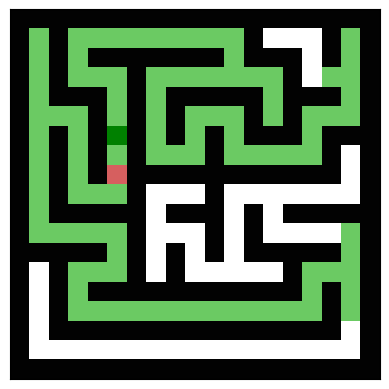

In [76]:
# Foraging animation
demo = SlimeMoldForaging(height=19, width=19)    # width and height should preferably be odd nunmbers
demo.process = "carve_pathway"
demo.step()
demo.place_item("mold")                 # present mold in green
demo.place_item("oat")                  # present oat in red
demo.process = "step_forage"
demo.animate(frames=100)          # show frames at 50 and 150 steps